<a href="https://colab.research.google.com/github/44REAM/CEB-image_processing/blob/main/Image_Fundamental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image Fundamental



In [ ]:
import numpy as np
import cv2
from copy import deepcopy

import seaborn as sns
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
img = cv2.imread('data/ct.jpeg')
print(f"image shape: {img.shape}")

ct_image = img[:,:,0]

image shape: (630, 522, 3)


# Image sampling and Quantization

**Definition**

To create a digital image, we need to convert the continuous sensed data into a digital format. This
requires two processes: sampling and quantization. Digitizing cordinate value is called sampling and digitized amplitude is called quantization.

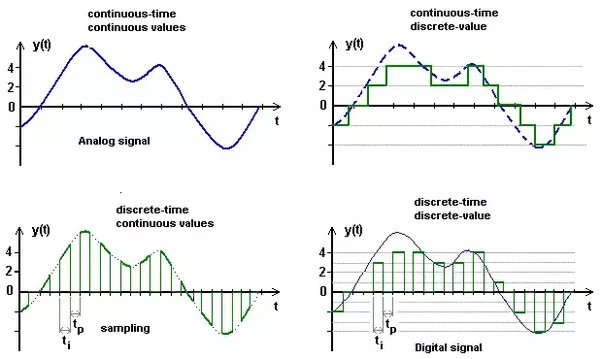

For digital image, we can represent a continuous image by a continuous function. After sampling and quantization, we convert a continuous image into digital image, f(x,y), with M rows and N columns, where (x,y) are discrete coordinates.

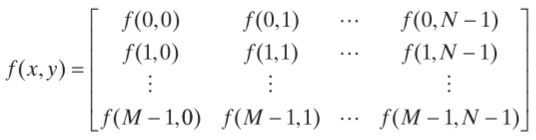

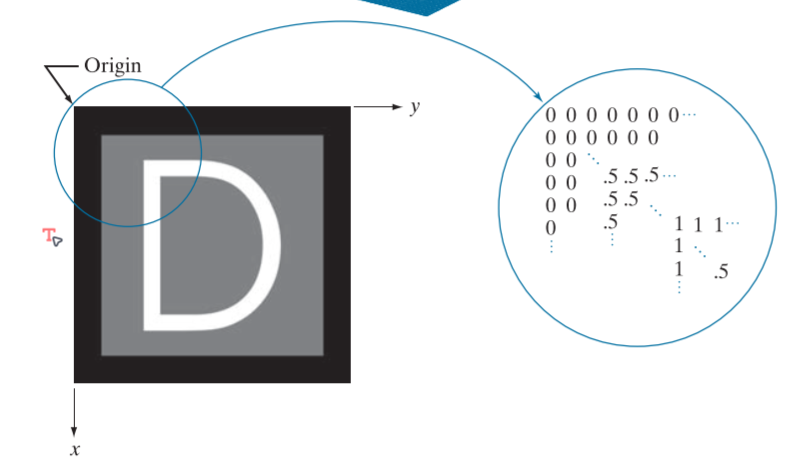

Lower sampling rate (decrete spatial resolution) cause bluring

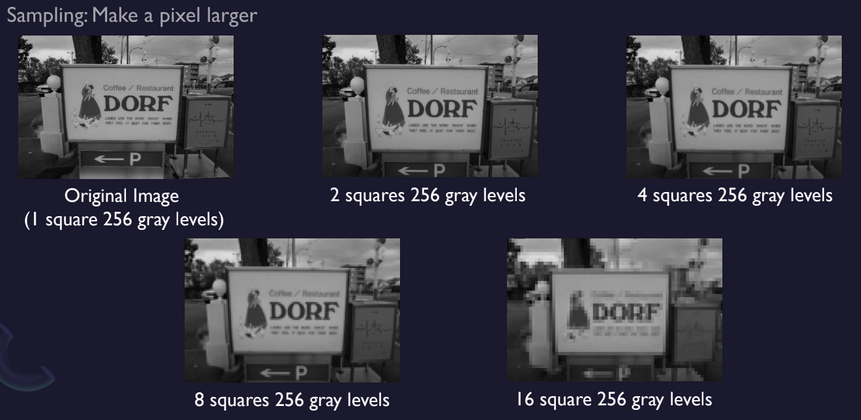

Lower quantization (decrete intensity resolution) cause low details

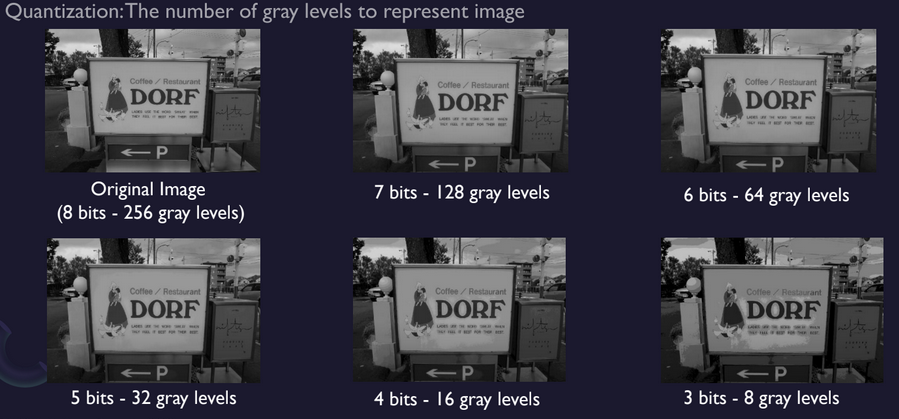

# Geometric operation

Geometric operation consist of two operation
1. Spatial transformation of coordinates
2. Intensity interpolation

- (Transformation in OpenCV) https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html
- (Interpolation in OpenCV) https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga5bb5a1fea74ea38e1a5445ca803ff121

Coordinate Transformation is used to define the spatial relationship between the original and transformed image. It involves mapping the coordinates of the original image to new coordinates in the transformed image. This step is crucial for operations like rotation, scaling, translation, and more complex transformations like affine or perspective transformations12.

Interpolation, on the other hand, is needed because after the transformation, the new coordinates often do not align perfectly with the original grid of pixels. Interpolation methods, such as nearest-neighbor, bilinear, or bicubic interpolation, are used to estimate the pixel values at these new locations, ensuring a smooth and continuous output image3.



## Transformation of coordinates

The transformation of coordinates can be written as

$$X' = T X$$


Where
- X is input coordinates
- X' is output coordinates
- T is transformation operator

Example (Translation)


$
T = \begin{bmatrix}
1 & 0 & 0\\
0 & 1 & -400\\
0 & 0 & 1
\end{bmatrix}
$

Let our original coordinate of image at (0, 0)

$X = \begin{bmatrix}
0 \\
0 \\
1
\end{bmatrix}$

Then the transformed coordinates is

$X'= \begin{bmatrix}
0 \\
-400 \\
1
\end{bmatrix}
$

transformed coordinate at (0,-400)

You can also written the transformation by

$
T = \begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
 (.)$ + $
\begin{bmatrix}
0 \\
-400
\end{bmatrix},
$
$ X =
\begin{bmatrix}
0 \\
0
\end{bmatrix}$,
$X'= \begin{bmatrix}
0 \\
-400
\end{bmatrix}
$



<Axes: ylabel='Count'>

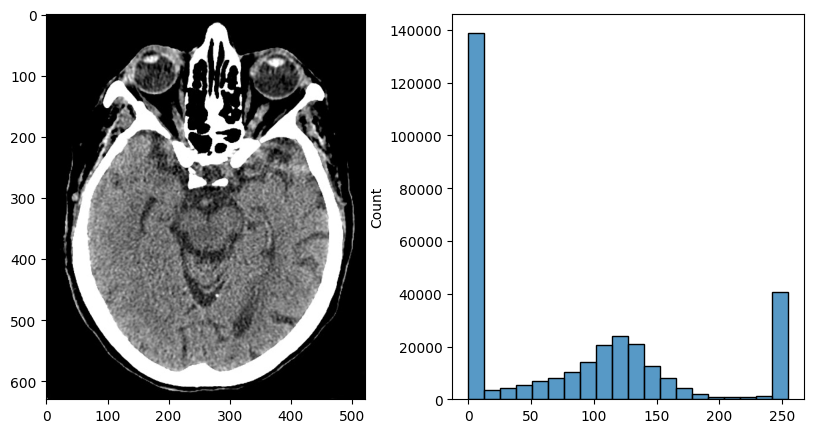

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (10,5))


axes[0].imshow(ct_image, cmap = 'gray')
sns.histplot(ct_image.ravel(), bins=20, ax = axes[1])

[[   1.    0.    0.]
 [   0.    1. -400.]]


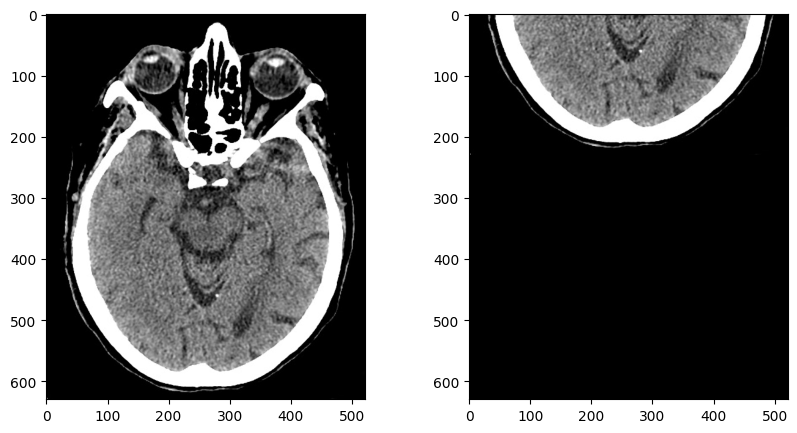

In [ ]:
# translation

rows,cols = ct_image.shape

# specify custom transformation matrix
T = np.float32([[1,0,0],[0,1,-400]])
image_size = (cols,rows)
dst = cv2.warpAffine(ct_image,T,image_size)

fig, axes = plt.subplots(1, 2, figsize = (10,5))

axes[0].imshow(ct_image, cmap = 'gray')
axes[1].imshow(dst, cmap = 'gray')

print(T)

# https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html

Rotation matrix

$$\begin{bmatrix}\cos \theta &-\sin \theta \\\sin \theta &\cos \theta \end{bmatrix}$$

[[   0.8660254     0.5        -122.53263039]
 [  -0.5           0.8660254   172.70199781]]


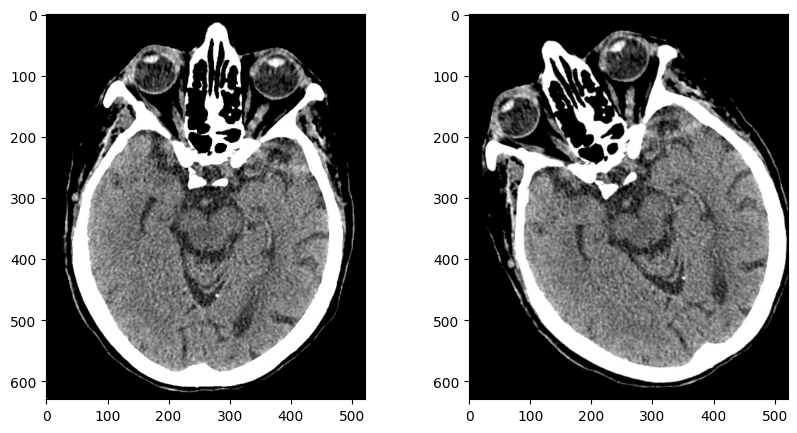

In [ ]:
# Rotation

rows,cols = ct_image.shape

center_of_rotation = (cols/2,rows/2)
angle = 30
scale = 1
M = cv2.getRotationMatrix2D(center_of_rotation,angle,scale)
dst = cv2.warpAffine(ct_image,M,(cols,rows))

print(M)

fig, axes = plt.subplots(1, 2, figsize = (10,5))
axes[0].imshow(ct_image, cmap = 'gray')
axes[1].imshow(dst, cmap = 'gray')

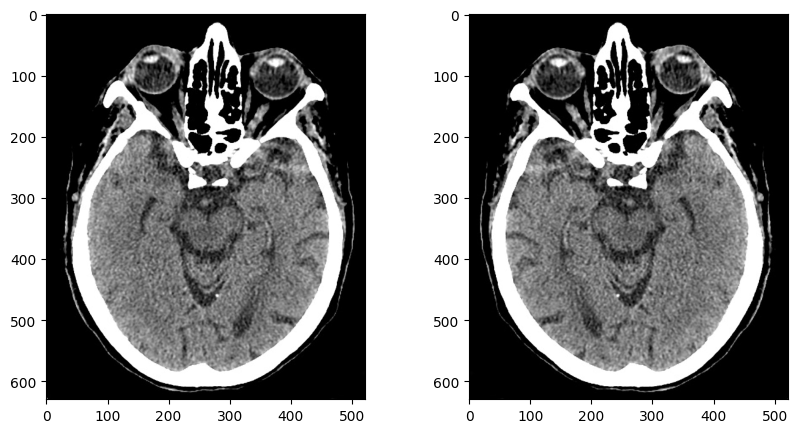

In [ ]:
# Flip

rows,cols = ct_image.shape

M = np.array([[-1.0, 0.0, cols],[0, 1, 0]])

dst = cv2.warpAffine(ct_image,M,(cols,rows))
fig, axes = plt.subplots(1, 2, figsize = (10,5))
axes[0].imshow(ct_image, cmap = 'gray')
axes[1].imshow(dst, cmap = 'gray')


### Linear transformation and affine transformation

In the context of linear algrebra, affine transformation is not linear map. In some context linear transformation and affine transformation is the same thing. The affine transformation is not linear because "Translation" not satifies linear transformation property.

Linear transformation property

1. preserve linear combinations
$$T(af(x) + bg(x)) = aT(f(x)) + bT(g(x))$$
2. $$T(\alpha v)=\alpha T(v) $$

However, we can make affine transformation linear by introduce homogeneous coordinates system.
$$\begin{bmatrix}
x\\
y
\end{bmatrix} -> \begin{bmatrix}
x\\
y\\
1
\end{bmatrix}$$

Affine transformation can be written in matrix form as below.

$$A = \begin{bmatrix}
a & b & t_x\\
c & d & t_y\\
0 & 0 & 1
\end{bmatrix}$$

**Definitions**

- **Affine transformation**: can be define as a composition of linear transformation and translation (since translation dose not preserve zero vector).
- **Rigid transformation**: defined as rotation and translation.
- **Similarity transformations**: defined as rotation, translation and scaling.

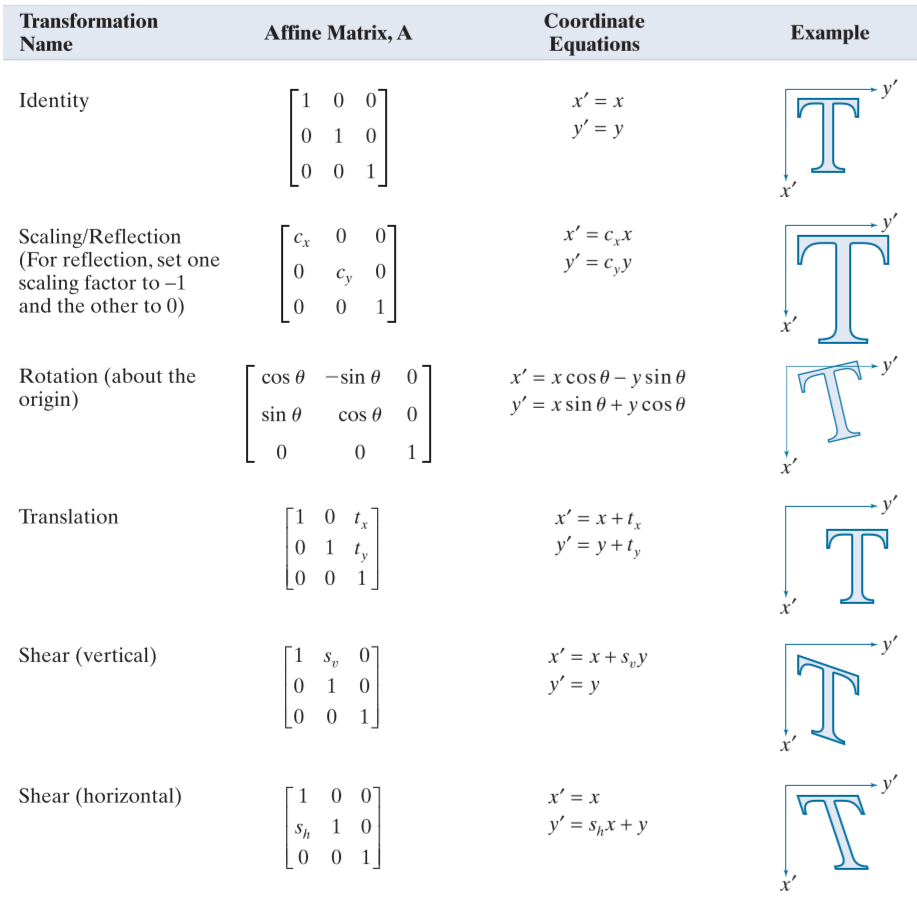

[[  1.26666667   0.6        -83.33333333]
 [ -0.33333333   1.          66.66666667]]


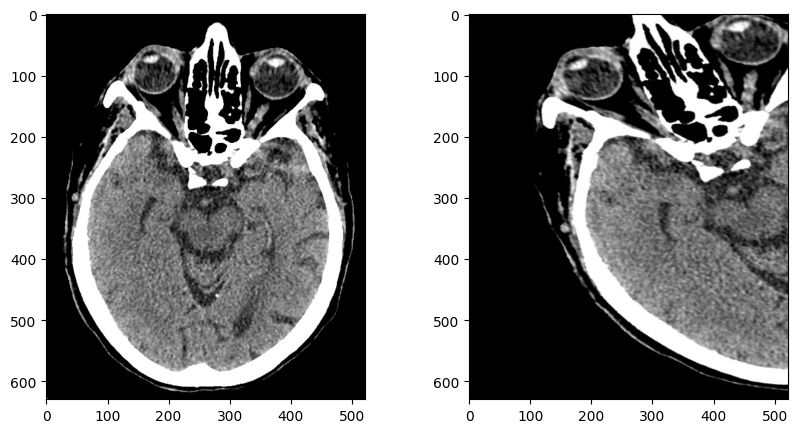

In [ ]:
# Affine transformation

rows,cols = ct_image.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv2.getAffineTransform(pts1,pts2)
print(M)
dst = cv2.warpAffine(ct_image,M,(cols,rows))
fig, axes = plt.subplots(1, 2, figsize = (10,5))
axes[0].imshow(ct_image, cmap = 'gray')
axes[1].imshow(dst, cmap = 'gray')


### Projective/perspective transformation

Projective transformation also linear transformation (most general form of linear transformation) in image processing context.
Projective transformation can be written in matrix form as below

$$H = \begin{bmatrix}
h_1 & h_2 & h_3\\
h_4 & h_5 & h_6\\
h_7 & h_8 & h_9
\end{bmatrix}$$
Where $H$ is Homography
$$ \hat{X} = HX $$

$$\hat{X} = \begin{bmatrix}
h_1 & h_2 & h_3\\
h_4 & h_5 & h_6\\
h_7 & h_8 & h_9
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
1
\end{bmatrix}$$
then normalize $\hat{X}$ to get $X'$
$$ X' = \begin{bmatrix}
\frac{h_1x + h_2y + h_3}{h_7x + h_8y + h_9} \\
\frac{h_4x + h_5y + h_6}{h_7x + h_8y + h_9} \\
1
\end{bmatrix}$$



[[ 1.61168829e+00  1.40146808e-01 -9.93640866e+01]
 [ 1.19316347e-01  2.86359234e+00 -1.92815217e+02]
 [-3.13177020e-03  2.97194440e-03  2.00000000e+00]]


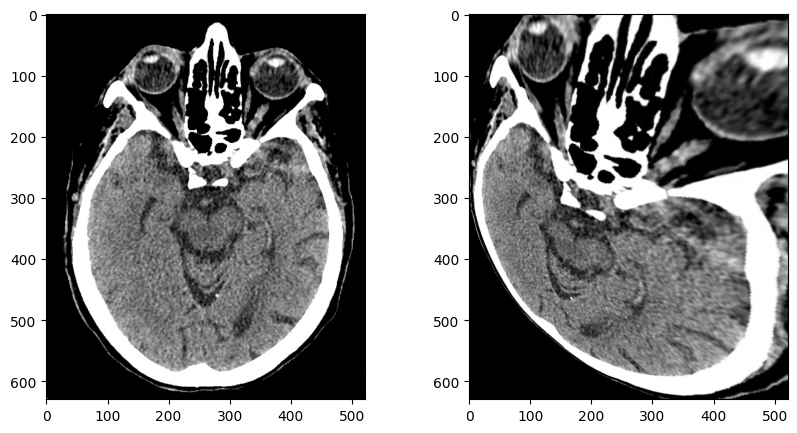

In [ ]:
rows,cols= ct_image.shape

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[500,0],[0,300],[300,500]])

M = cv2.getPerspectiveTransform(pts1,pts2)
# M = np.array([[ 8.05844144e-01,  7.00734038e-02, -4.96820433e+01],
#  [ 5.96581737e-02,  1.43179617e+00, -9.64076087e+01],
#  [-1.56588510e-03,  1.48597220e-03,  1.00000000e+00]])*2
print(M)
dst = cv2.warpPerspective(ct_image,M,(cols,rows))

fig, axes = plt.subplots(1, 2, figsize = (10,5))
axes[0].imshow(ct_image, cmap = 'gray')
axes[1].imshow(dst, cmap = 'gray')

## Local transformation



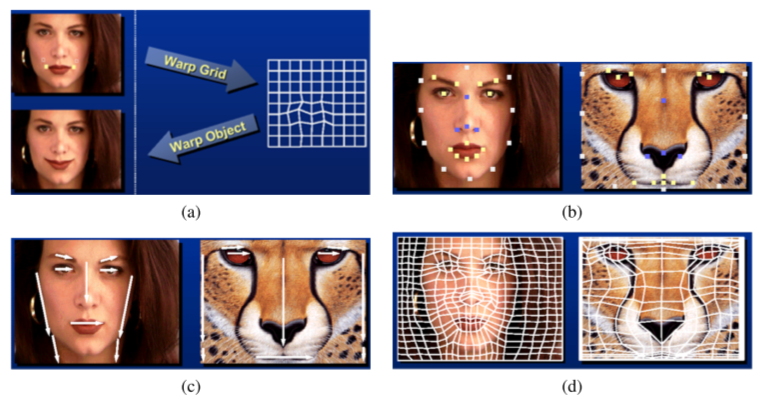



Consider, for example, changing the appearance of a face from a frown to a smile. What is needed in this case is to curve the corners of the mouth upwards while leaving the rest of the face intact. To perform such a transformation, different amounts of motion are required in
different parts of the image.

The transformation can be done by either control (such as b spline) or free-form deformation

Example

https://www.youtube.com/watch?v=N9BXpSzYCgQ

## Image interpolation

After coordinate transformation, we have to assign the intensity to new location. This task is call image interpolation.

Image interpolation is the process to estimate values at unknown location using known data.
Example: The simplest interpolation algorithm is nearest neighbor algorithm. When we resize our original (size 500 × 500 pixel) image to 750 × 750 pixel, we create a grid of 750 × 750 pixel and assign the intensity to the point by select the most nearest point from original image.

**Common tasks that usually use interpolation**
- Resizing
- Geometric operation such as rotation and translation

You can check interpolation method in openCV by the link below

https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga5bb5a1fea74ea38e1a5445ca803ff121

When you read the models description in pytorch, you may see that they also mention how they transform the image before use as input to deep learning model

https://pytorch.org/vision/stable/models/generated/torchvision.models.resnet50.html#torchvision.models.resnet50


Further reading/reference: https://www.mssc.mu.edu/~daniel/pubs/RoweTalkMSCS_BiCubic.pdf

### Bilinear interpolation

**1D linear interpolation**

model: $f(x) = a_0 + a_1x$

- Use 2 point for interpolation
- 2 equation, 2 unknown

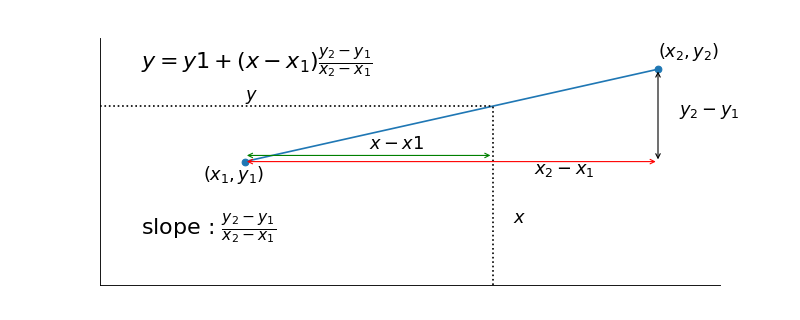

$$f(x_1) = a_0 + a_1*x_1$$
$$f(x_2) = a_0 + a_1*x_2$$

$$ y_1= a_0 + a_1*x_1$$
$$y_2 = a_0 + a_1*x_2$$



**2D Bilinear interpolation**

model: $f(x,y ) = \sum_{i = 0,j = 0}^{1,1} a_{i,j} x^iy^j$

- Use 4 points
- 4 equation, 4 unknown

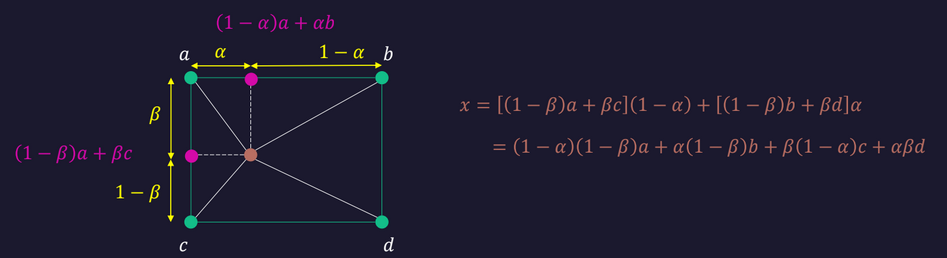

[[   1.    0.    0.]
 [   0.    1. -400.]]


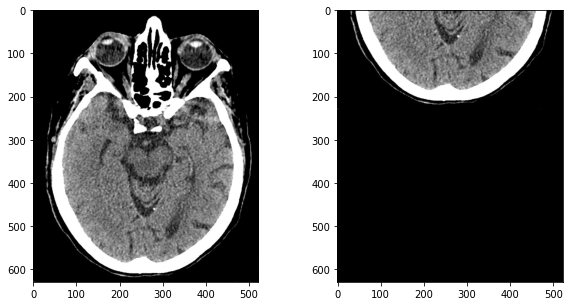

In [ ]:

# translation

rows,cols = ct_image.shape

M = np.float32([[1,0,0],[0,1,-400]])

dst = cv2.warpAffine(ct_image,M,(cols,rows), flags = cv2.INTER_LINEAR)

fig, axes = plt.subplots(1, 2, figsize = (10,5))

axes[0].imshow(ct_image, cmap = 'gray')
axes[1].imshow(dst, cmap = 'gray')

print(M)

# https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga5bb5a1fea74ea38e1a5445ca803ff121

### Bicubic Interpolation

**1D cubic interpolation**

model: $f(x) = a_0 + a_1x + a_2x^2 + a_3x^3$

- Use 4 point for interpolation
- 4 equation, 4 unknown


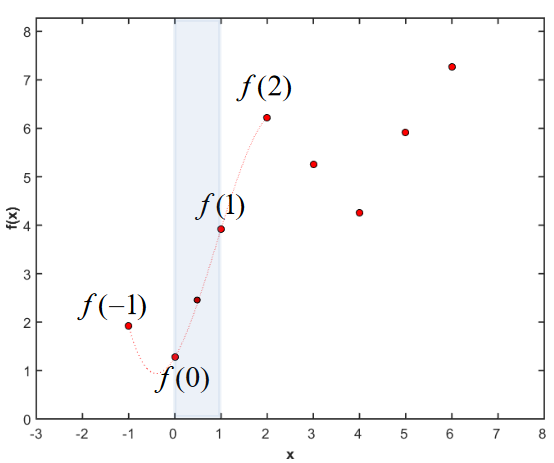

$$f(x_1) = a_0 + a_1x_1 + a_2x_1^2 + a_3x_1^3$$
$$f(x_2) = a_0 + a_1x_2+ a_2x_2^2 + x_2^3$$
$$ f(x_0)= a_0 + a_1x_0+ a_2x_0^2 + a_3x_0^3$$
$$ f(x_{-1}) = a_0 + a_1x_{-1}+ a_2x_{-1}^2 + a_3x_{-1}^3$$

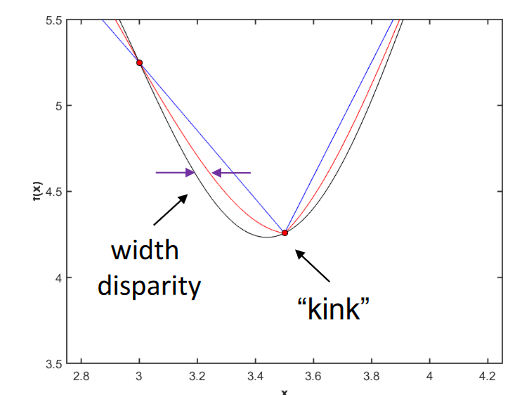

**1D cubic spline interpolation**

model:

$f(x) = a_0 + a_1x + a_2x^2 + a_3x^3$

$f'(x) = a_1 + 2a_2x + 3a_3x^2$

- Use 2 point and 2 derivative for interpolation
- 4 equation, 4 unknown

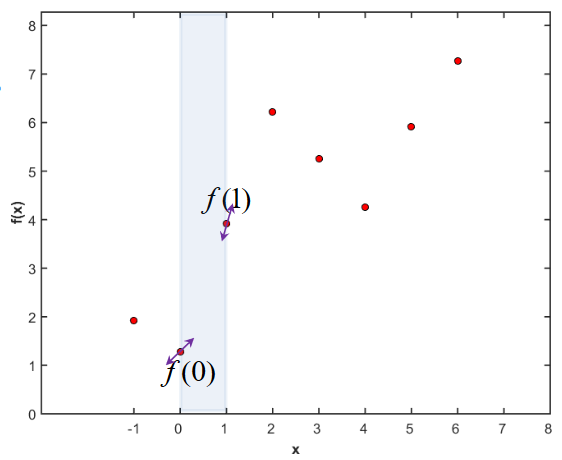

$$f(x_1) = a_0 + a_1x_1 + a_2x_1^2 + a_3x_1^3$$
$$ f(x_0)= a_0 + a_1x_0+ a_2x_0^2 + a_3x_0^3$$

$$f'(x_1) = \frac{f(x_2) - f(x_0)}{2} =  a_1 + 2a_2x_1 + 3a_3x_1^2$$
$$ f'(x_0) = \frac{f(x_1) - f(x_{-1} ) }{2} =  a_1 + 2a_2x_0 + 3a_3x_0^2$$

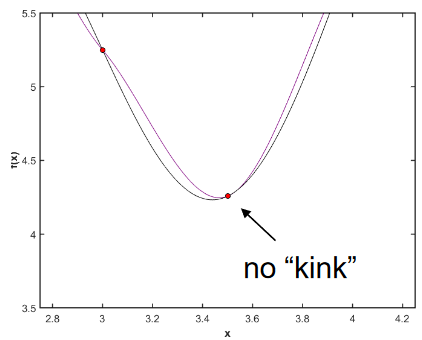



**2D bicubic interpolation**

model: $f(x,y ) = \sum_{i = 0,j = 0}^{3,3} a_{i,j} x^iy^j$

- Use 4 point for interpolation
- 16 equation, 16 unknown

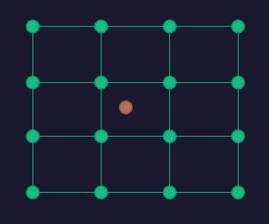

**2D bicubic spline interpolation**

model:

$f(x,y ) = \sum_{i = 0,j = 0}^{3,3} a_{i,j} x^iy^j$

$ \frac{\partial f(x,y )}{ \partial y} =
\sum_{i = 0,j = 0}^{3,3} a_{i,j} jx^iy^{j-1}$

$ \frac{\partial f(x,y )}{ \partial x} =
\sum_{i = 0,j = 0}^{3,3} a_{i,j} ix^{i-1}y^{j}$

$ \frac{\partial^2 f(x,y )}{ \partial x \partial y} =
\sum_{i = 0,j = 0}^{3,3} a_{i,j} ijx^{i-1}y^{j-1}$

- Use 4 point for interpolation
- 16 equation, 16 unknown

# SimpleITK

***Please read this all if you working with DICOM data***

https://insightsoftwareconsortium.github.io/SimpleITK-Notebooks/

- https://insightsoftwareconsortium.github.io/SimpleITK-Notebooks/Python_html/01_Image_Basics.html
- https://insightsoftwareconsortium.github.io/SimpleITK-Notebooks/Python_html/21_Transforms_and_Resampling.html
- https://insightsoftwareconsortium.github.io/SimpleITK-Notebooks/Python_html/22_Transforms.html

Interpolator references

- https://simpleitk.org/doxygen/latest/html/namespaceitk_1_1simple.html#a7cb1ef8bd02c669c02ea2f9f5aa374e5

Transform references

- https://simpleitk.readthedocs.io/en/master/fundamentalConcepts.html#transforms
- https://insightsoftwareconsortium.github.io/SimpleITK-Notebooks/Python_html/22_Transforms.html

## Image as physical objects

Treating images as physical objects is crucial in certain fields because it ensures the accurate representation, analysis, and interpretation of spatial relationships, dimensions, and properties. SimpleITK treats images as physical objects, considering spatial dimensions, orientation, and spacing instead of just a matrix.

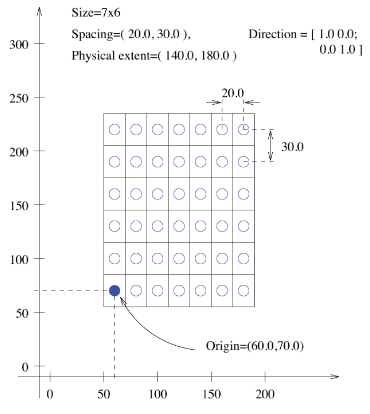

In [1]:
import matplotlib.pyplot as plt
import SimpleITK as sitk

In [ ]:
img = sitk.ReadImage('CT_Abdo.nii')
img_array = sitk.GetArrayFromImage(img)


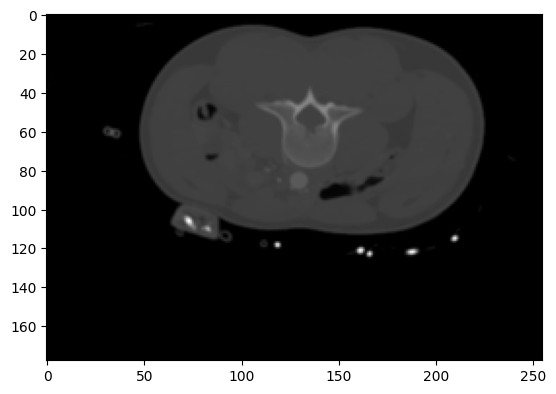

In [ ]:
plt.imshow(img_array[0], cmap = 'gray')

In [ ]:

print('img size',img.GetSize())
print('img spacing',img.GetSpacing())
print('img origin',img.GetOrigin())
print('img direction',img.GetDirection())
print('Pixel type',img.GetPixelIDTypeAsString())

print('img array',img_array.shape)


img size (255, 178, 256)
img spacing (1.4937503337860107, 1.489554524421692, 1.494140625)
img origin (226.39654541015625, 131.16995239257812, -181.25)
img direction (-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)
Pixel type 16-bit signed integer
img array (256, 178, 255)


## Numpy to SimpleITK

In [ ]:
import numpy as np
from copy import deepcopy

nda = np.zeros((10,20,3))

#if this is supposed to be a 3D gray scale image [x=3, y=20, z=10]
img = sitk.GetImageFromArray(nda)
print(img.GetSize())



(3, 20, 10)


In [ ]:

print('img size',img.GetSize())
print('img spacing',img.GetSpacing())
print('img origin',img.GetOrigin())
print('img direction',img.GetDirection())
print('Pixel type',img.GetPixelIDTypeAsString())

print('img array',sitk.GetArrayFromImage(img).shape)


img size (3, 20, 10)
img spacing (1.0, 1.0, 1.0)
img origin (0.0, 0.0, 0.0)
img direction (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
Pixel type 64-bit float
img array (10, 20, 3)


In [ ]:
img_copy = deepcopy(img)

img_copy.SetSpacing([0.5,0.5,1.5])
img_copy.SetOrigin([5,5,5])

In [ ]:
print('img size',img_copy.GetSize())
print('img spacing',img_copy.GetSpacing())
print('img origin',img_copy.GetOrigin())
print('img direction',img_copy.GetDirection())
print('Pixel type',img_copy.GetPixelIDTypeAsString())

print('img array',sitk.GetArrayFromImage(img_copy).shape)

img size (3, 20, 10)
img spacing (0.5, 0.5, 1.5)
img origin (5.0, 5.0, 5.0)
img direction (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
Pixel type 64-bit float
img array (10, 20, 3)


## Geometric operation

In [ ]:
print('*Affine Transform*')
dimension = 2
point = (1.0, 1.0)
affine = sitk.AffineTransform(dimension)

print('Parameters: ' + str(affine.GetParameters()))
print('FixedParameters: ' + str(affine.GetFixedParameters()))
affine.TransformPoint(point)

print('')
affine.SetTranslation((3.1, 4.4))
print('Parameters: ' + str(affine.GetParameters()))
affine.TransformPoint( point)

*Affine Transform*
Parameters: (1.0, 0.0, 0.0, 1.0, 0.0, 0.0)
FixedParameters: (0.0, 0.0)

Parameters: (1.0, 0.0, 0.0, 1.0, 3.1, 4.4)


(4.1, 5.4)

In [ ]:

# transformation matrix is defined in 2*2 matrix
print(affine.GetMatrix())

# Translation is separate from the matrix
print(affine.GetTranslation())

(1.0, 0.0, 0.0, 1.0)
(3.1, 4.4)


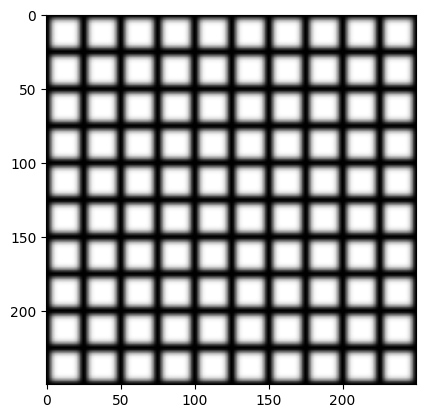

In [ ]:
grid = sitk.GridSource(outputPixelType=sitk.sitkUInt16,
    size=(250, 250),
    gridSpacing=(5.0, 5.0),
    spacing=(0.2,0.2))
plt.imshow(sitk.GetArrayViewFromImage(grid), cmap='gray')

In [ ]:
degrees = 10
new_transform = sitk.AffineTransform(2)

radians = -np.pi * degrees / 180.
rotation = np.array([[np.cos(radians), -np.sin(radians)],[np.sin(radians), np.cos(radians)]])
new_transform.SetMatrix(rotation.ravel())

new_transform.SetTranslation((-5, -5))

Recommend linear transform:

- **VersorRigid3DTransform**/Euler3DTransform : for rigid transformation
- **AffineTransform**: for affine transformation

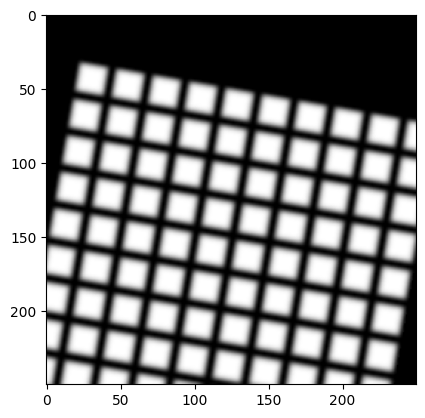

In [ ]:
reference_image = grid
interpolator = sitk.sitkLinear
default_value = 0
new_img = sitk.Resample(grid, reference_image, new_transform,
                         interpolator, default_value)

plt.imshow(sitk.GetArrayViewFromImage(new_img), cmap='gray')

### Non-linear transform:

- **BSplineTransform** : for B-Spline transformation
- **DisplacementFieldTransform**: for affine transformation

#### B-Splines (Basis spline)

B-Splines, or Basis splines, are a family of mathematical functions that are commonly used in computer graphics and image processing. A spline function of order n is a piecewise polynomial function of degree n − 1. The places where the pieces meet are known as knots. The key property of spline functions is that they and their derivatives may be continuous, depending on the multiplicities of the knots.

- Control Points: These are the points that define the shape of the curve. The curve does not necessarily pass through these points but is influenced by their position1.
- Knot Vector: This is a sequence of parameter values that determines where and how the control points affect the B-spline curve1.
- Order of the Curve: This is defined as the degree of the polynomial.

B-Spline animation: https://nurbscalculator.in/

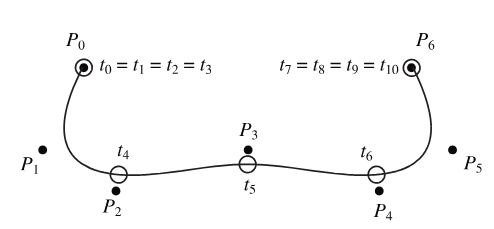

Knot Vector
A knot vector is a nondecreasing sequence defined as:
$$
\{t_0,t_1,...,t_m\}
$$
where  $( t_i \leq t_{i+1} )$ and $( m \geq n + p + 1 ).$

Control Points
The control points are defined as:
$$
\{P_0,P_1,...,P_n\}
$$
Degree
The degree of the B-spline is given by:
$$
p=m-n-1
$$
Basis Functions
The basis functions $( N_{i,p}(t) )$ are defined recursively, starting with:

$$
N_{i,0}(t) =
\begin{cases}
  1 & \text{if} \ t_i \le t < t_{i+1} \text{ and } t_i < t_{i+1} \\    
  0 &\text{otherwise}
\end{cases}
$$

and for $( p \geq 1 )$:

$$
N_{i,p}(t) = \frac{t-t_i}{t_{i+p}-t_i} N_{i,p-1}(t) + \frac{t_{i+j+1}-t}{t_{i+j+1}-t_{i+1}} N_{i+1,p-1}(t)
$$

B-Spline Curve
The B-spline curve ( C(t) ) is defined as:

$$
C(t)=∑_{i=0}^nN_{i,p}(t) \cdot P_i
$$


#### B-Spline Surface

![figures/bspline2d.png](figures/bspline2d.png)

https://shellbuckling.com/presentations/otherTopics/pages/page_254.html

#### B-Spline Curve Example

##### Example: Cubic B-Spline Curve (Degree 3)

Consider a cubic B-spline curve (degree k = 3) with 5 control points:

- P₀ = (0, 0)
- P₁ = (1, 3)
- P₂ = (3, 2)
- P₃ = (5, 4)
- P₄ = (6, 0)

##### Knot Vector

For this example, we'll use a uniform knot vector with multiple knots at the endpoints:

T = [0, 0, 0, 0, 0.5, 1, 1, 1, 1]

##### Basis Function Behavior

For our cubic example, at parameter t = 0.75:
- Only $N_{1,3}(0.75), N_{2,3}(0.75), N_{3,3}(0.75)$, and $N_{4,3}(0.75)$ are non-zero
- All other basis functions are zero at this parameter value

This means that at t = 0.75, the curve is influenced by only three control points: $P_1, P_2, P_3$ and $P_4$.

##### Local Control Property

If we modify control point P₂:
- The curve changes only in the parameter range [t₂, t₂₊ₖ₊₁] = [0, 1]
- Specifically, it affects the curve most in the middle section

If we modify control point P₃:
- The curve changes only in the parameter range [t₃, t₃₊ₖ₊₁] = [0, 1]
- The greatest effect is toward the end of the curve

##### Sample Points Along the Curve

Here are some calculated points along this B-spline curve:

| Parameter t | Point on Curve C(t) |
|-------------|---------------------|
| 0.0         | (0.17, 0.50)        |
| 0.2         | (1.08, 1.83)        |
| 0.4         | (2.33, 2.50)        |
| 0.6         | (3.58, 2.83)        |
| 0.8         | (4.67, 2.83)        |
| 1.0         | (5.83, 0.50)        |


#### Displacement field transform

In the context of image processing, a displacement field transform is a technique used to model local or dense transformations. It’s particularly useful for high-dimensionality transformations.

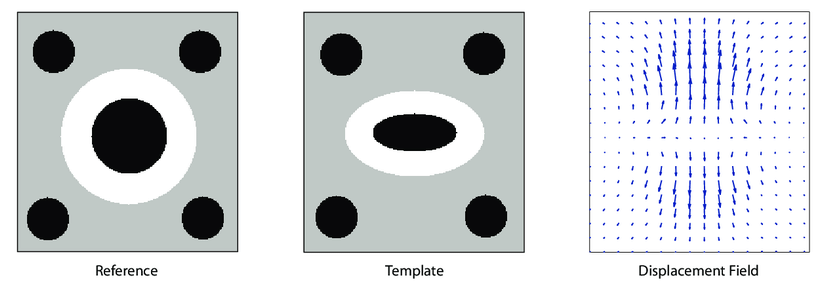

- Displacement Field: This field stores vectors of displacements. Each vector specifies both the magnitude and direction of translation for a specific point in the image. Essentially, it tells us how each point in the original image moves to its new position in the transformed image.
- At a given point in the image, the transformation is performed by adding the displacement vector at that point to the input point.

![figures/1-s2.0-S1076567022000544-f01-09-9780323988636.jpg](figures/1-s2.0-S1076567022000544-f01-09-9780323988636.jpg)

https://www-sciencedirect-com.ejournal.mahidol.ac.th/topics/computer-science/displacement-field


![figures/dis.png](figures/dis.png)

J. Chen et al., “Deformer: towards displacement field learning for unsupervised medical image registration,” in Lecture notes in computer science, 2022, pp. 141–151. doi: 10.1007/978-3-031-16446-0_14.

| Feature                        | **B-spline Transform**                          | **Displacement Field Transform**              |
|-------------------------------|--------------------------------------------------|------------------------------------------------|
| Type                          | Parametric / Model-based                        | Non-parametric / Dense                        |
| Representation                | Grid of control points with smooth interpolation | Dense per-pixel or per-voxel displacement     |
| Smoothness                    | Inherently smooth (due to B-spline basis)       | Not guaranteed; needs regularization          |
| Memory                        | Efficient (fewer parameters)                    | High memory usage (one vector per pixel/voxel)|
| Computational Cost            | Lower                                            | Higher                                         |
| Typical Use Cases             | Medical image registration, animation, modeling | Fine non-rigid registration, diffeomorphic models |


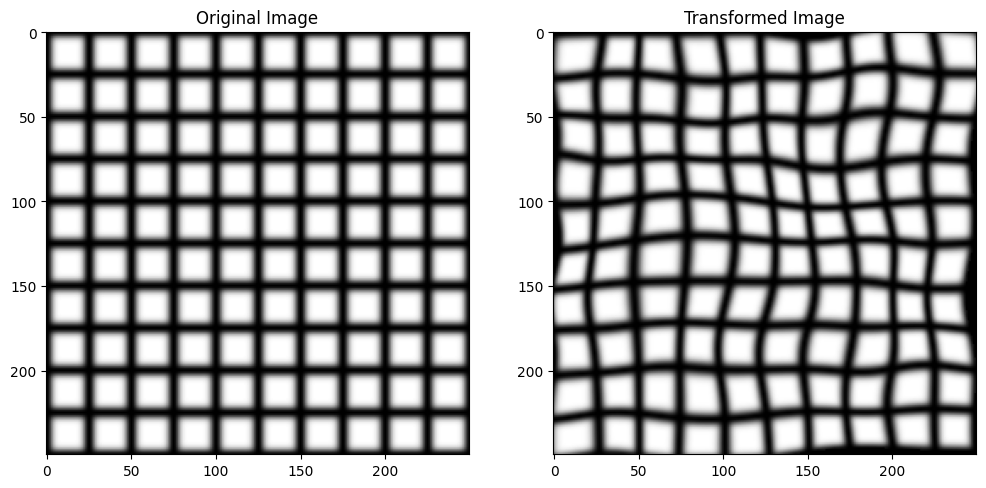

In [3]:
import SimpleITK as sitk
import numpy as np
grid = sitk.GridSource(outputPixelType=sitk.sitkUInt16,
    size=(250, 250),
    gridSpacing=(5.0, 5.0),
    spacing=(0.2,0.2))
# Define a B-spline transform
image_size = grid.GetSize()
mesh_size = [8, 8]  # Example mesh size for a 2D image

# Create the initial B-spline transform

dimension = 2
# * degree
spline_order = 3

bspline_transform = sitk.BSplineTransform(dimension, spline_order)
# Set size of physical dimensions

bspline_transform.SetTransformDomainPhysicalDimensions( [image_size[0]*grid.GetSpacing()[0], image_size[1]*grid.GetSpacing()[1]] )
bspline_transform.SetTransformDomainMeshSize(mesh_size)

# Create a random deformation field for the B-spline transform
# * Control Points in one dimension = Number of Control Points = Mesh Size + Degree = 11
# * All control points = 121
# * Each control points have 2 parameters then all parameters = 242
parameters = np.random.randn(bspline_transform.GetNumberOfParameters())
bspline_transform.SetParameters(parameters)

# Apply the B-spline transformation
resampler = sitk.ResampleImageFilter()
resampler.SetReferenceImage(grid)  # Use the original image as reference
resampler.SetTransform(bspline_transform)
resampler.SetInterpolator(sitk.sitkLinear)
resampler.SetDefaultPixelValue(0)  # Default value for out-of-bounds pixels

transformed_image = resampler.Execute(grid)

# Display the original and transformed images
image_array = sitk.GetArrayFromImage(grid)
transformed_image_array = sitk.GetArrayFromImage(transformed_image)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image_array, cmap='gray')  # Display the original image
axes[0].set_title('Original Image')
axes[1].imshow(transformed_image_array, cmap='gray')  # Display the transformed image
axes[1].set_title('Transformed Image')
plt.show()

In [5]:
bspline_transform.GetNumberOfParameters()

242